In [1]:
# Run all
import webbrowser
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from matplotlib import pyplot as plt
from dash import Dash, html, dash_table, dcc, Input, Output, callback

C:\Users\pulga\AppData\Local\Temp\ipykernel_9280\1918451354.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("./../Input/heart_disease.csv")
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
nullvalue = df["HeartDisease"].isnull().sum()
nullvalue

0

In [6]:
label_encoder = preprocessing.LabelEncoder()
df["HeartDisease"] = label_encoder.fit_transform(df["HeartDisease"])
df.head(10)

# Yes=1; No=0

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,1,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,0,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,0,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,0,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,0,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

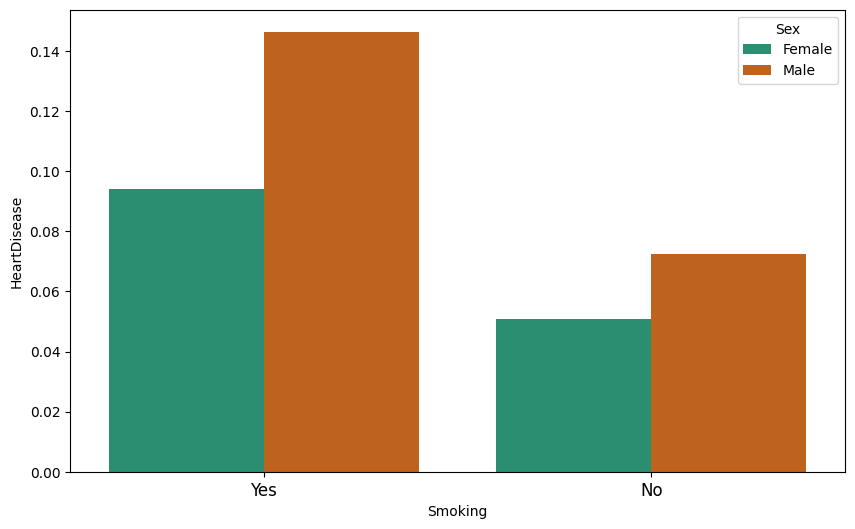

In [7]:
fig1, bar1 = plt.subplots(figsize=(10, 6), sharex=True)
sns.barplot(
    data=df,
    x=df["Smoking"],
    y=df["HeartDisease"],
    hue=df["Sex"],
    palette="Dark2",
    errorbar=None,
    legend=True,
)

bar1.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=0, fontsize=12)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

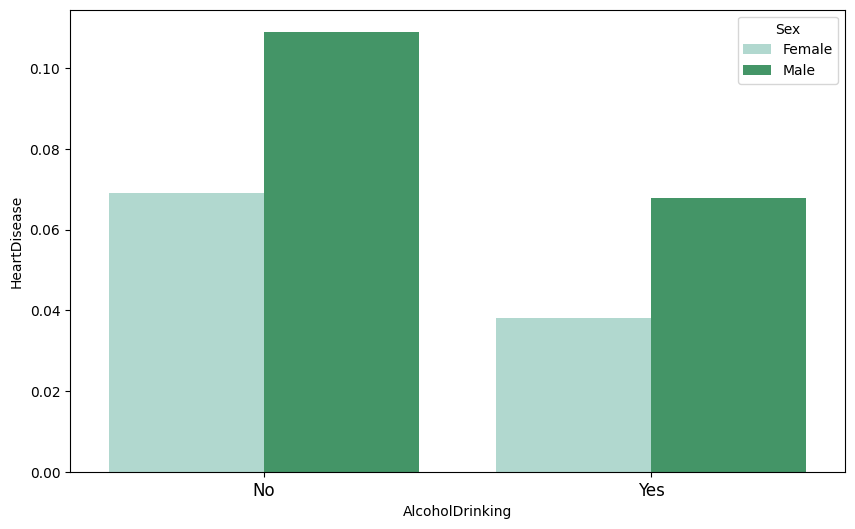

In [8]:
fig2, bar2 = plt.subplots(figsize=(10, 6), sharex=True)
sns.barplot(
    data=df,
    x=df["AlcoholDrinking"],
    y=df["HeartDisease"],
    hue=df["Sex"],
    palette="BuGn",
    errorbar=None,
    legend=True,
)

bar2.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=0, fontsize=12)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

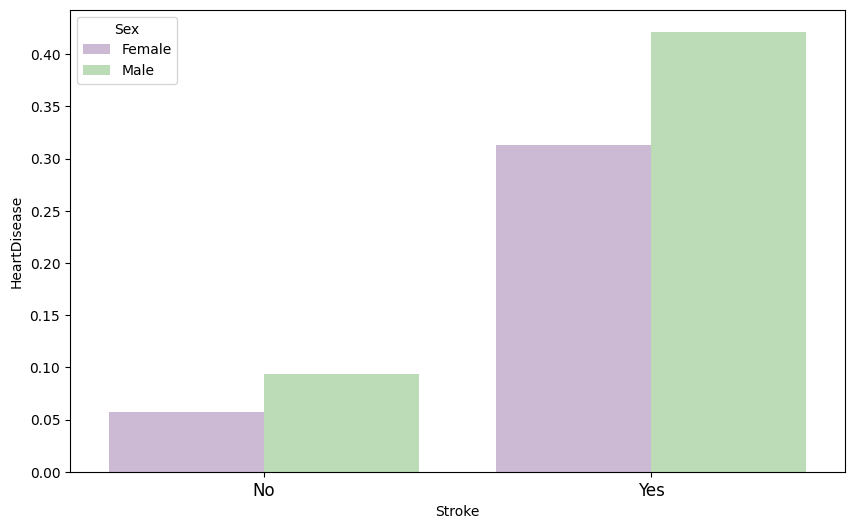

In [9]:
fig3, bar3 = plt.subplots(figsize=(10, 6), sharex=True)
sns.barplot(
    data=df,
    x=df["Stroke"],
    y=df["HeartDisease"],
    hue=df["Sex"],
    palette="PRGn",
    errorbar=None,
    legend=True,
)

bar3.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=0, fontsize=12)

In [10]:
df["HeartDisease"].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

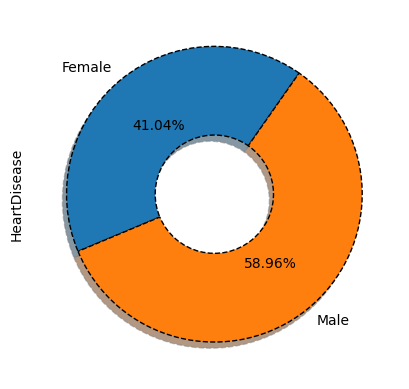

In [11]:
pievalues = df.groupby("Sex")["HeartDisease"].apply(
    lambda x: np.where(x == 1, x, 0).sum()
)

pievalues.plot(
    kind="pie",
    autopct="%1.2f%%",
    shadow={"ox": -0.02, "oy": -0.03, "edgecolor": "gray", "shade": 0.6},
    startangle=55,
    wedgeprops={"width": 0.6, "edgecolor": "black", "linewidth": 1, "linestyle": "--"},
)

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '18-24'),
  Text(1, 0, '25-29'),
  Text(2, 0, '30-34'),
  Text(3, 0, '35-39'),
  Text(4, 0, '40-44'),
  Text(5, 0, '45-49'),
  Text(6, 0, '50-54'),
  Text(7, 0, '55-59'),
  Text(8, 0, '60-64'),
  Text(9, 0, '65-69'),
  Text(10, 0, '70-74'),
  Text(11, 0, '75-79'),
  Text(12, 0, '80 or older')])

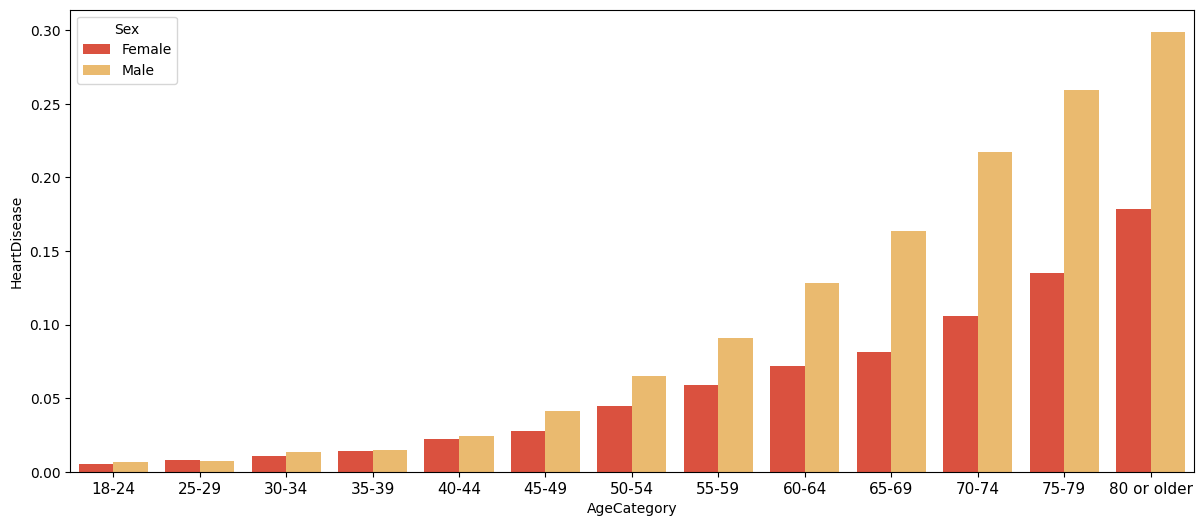

In [12]:
fig4, bar4 = plt.subplots(figsize=(14.5, 6), sharex=True)
ordered = df.sort_values("AgeCategory", ascending=True)
sns.barplot(
    data=df,
    x=df["AgeCategory"],
    y=df["HeartDisease"],
    hue=df["Sex"],
    order=ordered["AgeCategory"],
    palette="YlOrRd_r",
    errorbar=None,
    legend=True,
)

bar4.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=0, fontsize=11)

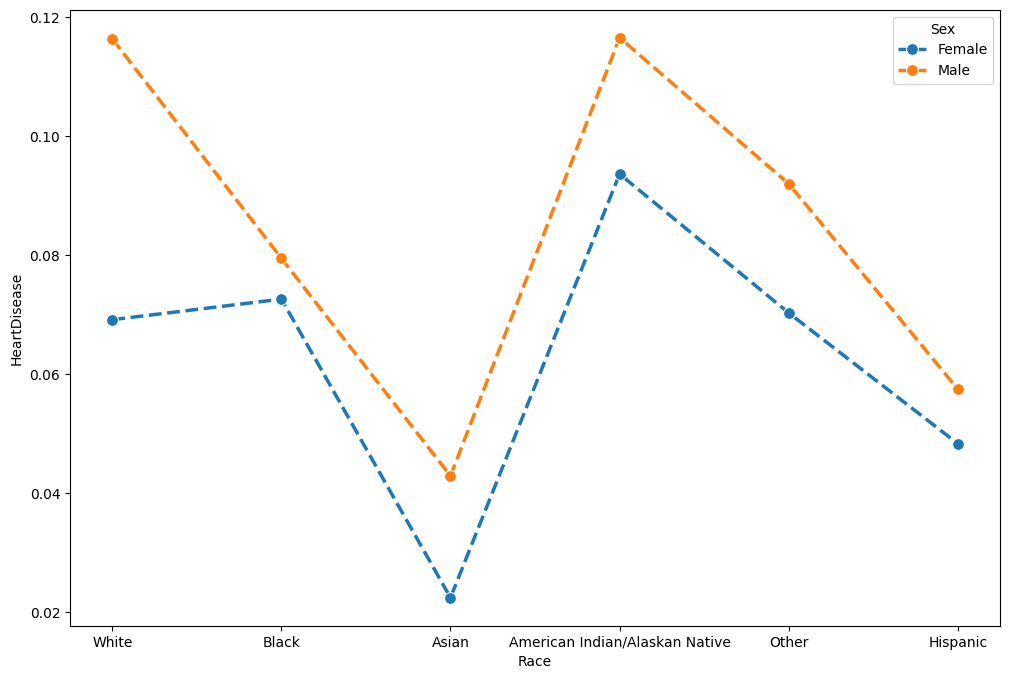

In [13]:
fig5, plot = plt.subplots(figsize=(12, 8))

sns.lineplot(
    data=df,
    x=df["Race"],
    y=df["HeartDisease"],
    marker="o",
    markersize=8.5,
    linestyle="--",
    linewidth=2.5,
    hue=df["Sex"],
    errorbar=None,
)

plt.show()

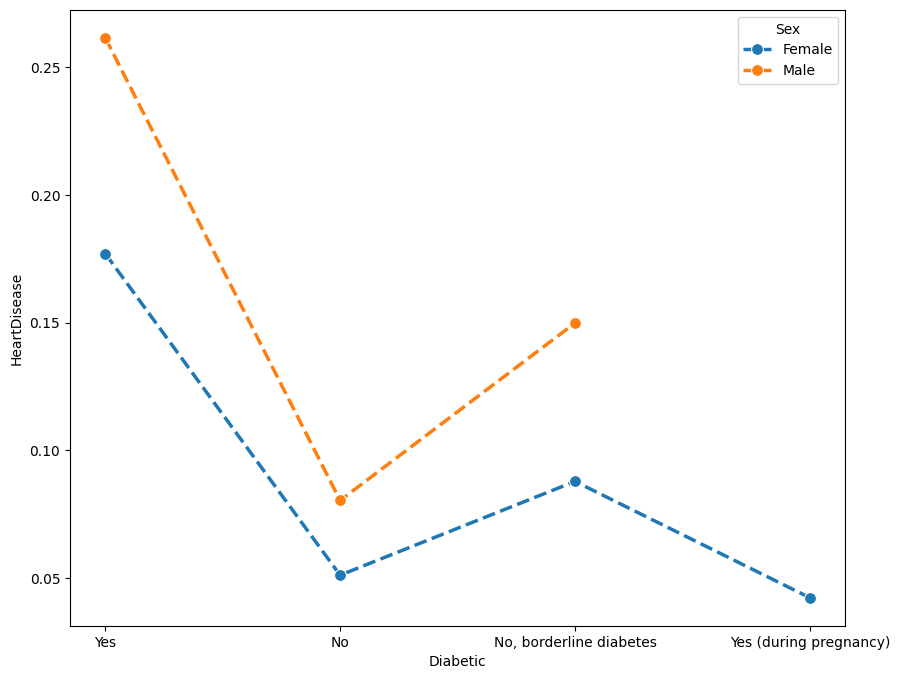

In [14]:
fig6, plot2 = plt.subplots(figsize=(10, 8))

sns.lineplot(
    data=df,
    x=df["Diabetic"],
    y=df["HeartDisease"],
    marker="o",
    markersize=8.5,
    linestyle="--",
    linewidth=2.5,
    hue=df["Sex"],
    errorbar=None,
)

plt.show()

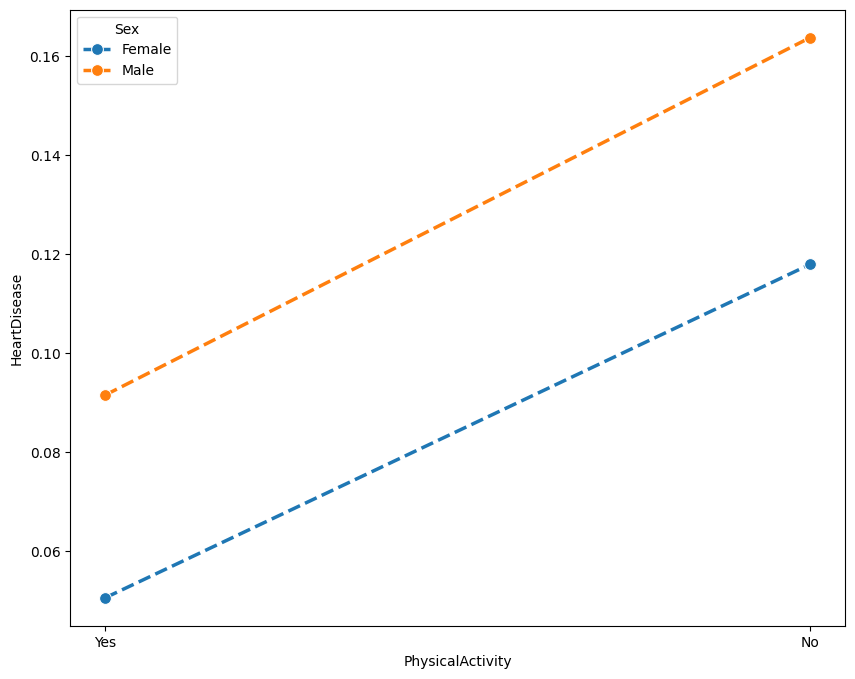

In [15]:
fig7, plot3 = plt.subplots(figsize=(10, 8))

sns.lineplot(
    data=df,
    x=df["PhysicalActivity"],
    y=df["HeartDisease"],
    marker="o",
    markersize=8.5,
    linestyle="--",
    linewidth=2.5,
    hue=df["Sex"],
    errorbar=None,
)

plt.show()

In [16]:
app = Dash(__name__)
app.title = "Heart Disease Analysis"

app.layout = html.Div(
    [
        html.H1("Heart Disease Analysis"),
        dcc.Tabs(
            id="tabs",
            value="tab1",
            children=[
                dcc.Tab(label="Data Table", value="tab1"),
                dcc.Tab(label="Cardiogenic Habits", value="tab2"),
                dcc.Tab(label="Cardiometabolic Diseases", value="tab3"),
                dcc.Tab(label="Lifestyle", value="tab4"),
                dcc.Tab(label="Genre, Age and Race", value="tab5"),
            ],
        ),
        html.Div(id="content"),
    ]
)

In [17]:
@app.callback(Output("content", "children"), Input("tabs", "value"))
def update(tab):
    if tab == "tab1":
        return (
            html.Div(
                children="Data",
                style={"text-align": "center", "font-size": "30px"},
            ),
            dash_table.DataTable(data=df.to_dict("records"), page_size=15),
            html.Br(),
        )

    elif tab == "tab2":
        return (
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["Smoking"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
            html.Br(),
            html.Br(),
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["AlcoholDrinking"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            )
        )
    
    elif tab == "tab3":
        return (
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["Stroke"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
            html.Br(),
            html.Br(),

            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["Diabetic"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
        )
    
    elif tab == "tab4":
        return(
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["PhysicalActivity"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
        )
    
    elif tab == "tab5":
        return(
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["AgeCategory"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["Race"],
                    y=df["HeartDisease"],
                    color=df["Sex"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),

            dcc.Graph(
                figure=px.histogram(
                    df,
                    x=df["Sex"],
                    y=df["HeartDisease"],
                    barmode="group",
                    histfunc="avg",
                    width=1400,
                    height=800,
                )
            ),
        )

In [18]:
if __name__ == "__main__":
    app.run_server(debug=False)

webbrowser.open_new("http://127.0.0.1:8050/")

True